# 安裝 gspread 以及下列套件

## gspread 用法: http://www.voidcc.com/project/gspread

In [18]:
!pip install --upgrade google-api-python-client
!pip install gspread
!pip install --upgrade oauth2client 

Requirement already up-to-date: google-api-python-client in c:\users\jiangsir\anaconda3\lib\site-packages (1.7.8)
Requirement already up-to-date: oauth2client in c:\users\jiangsir\anaconda3\lib\site-packages (4.1.3)


# 取得憑證 (OAuth Client ID)

申請項目去讀取google sheet，憑證要稍微注意一下就是是要申請「OAuth client ID」的憑證

申請網址: https://console.developers.google.com/flows/enableapi?apiid=sheets.googleapis.com&pli=1

建立或選擇一個專案: 


AutoEditByPython
電子郵件地址
autoeditbypython@autoeditbypython.iam.gserviceaccount.com
金鑰 ID
2db55f94eef3c10248d764fa02df8c703832b7c3

743ed4c920f3eef29ff394911589742525c65626

 這是您的用戶端 ID 
 
701044653095-542h12rr3k9daccbdeptm9nrjkjv7n8l.apps.googleusercontent.com

您的用戶端密鑰如下

9ufZOYLL5zOXIavPUo906SMw



# 取得憑證(Service Account)

## 申請網址(Google Cloud Console): https://console.developers.google.com/project


## 先到 Google Developers Console 建立一個 project。

## 啟動該 project 的 Google Sheet API。 https://console.developers.google.com/apis/api/sheets.googleapis.com/overview

### https://console.developers.google.com/apis/api/



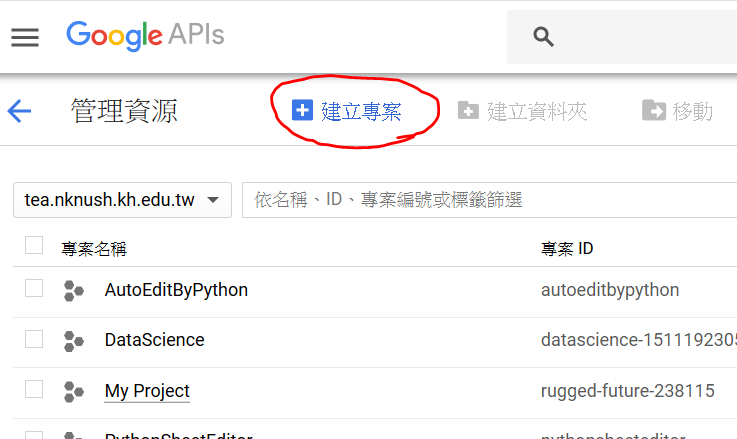

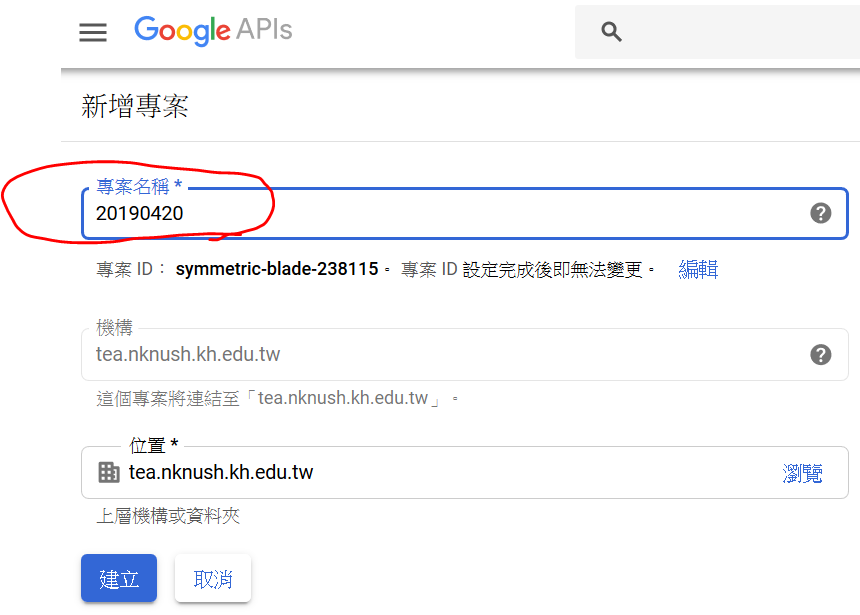

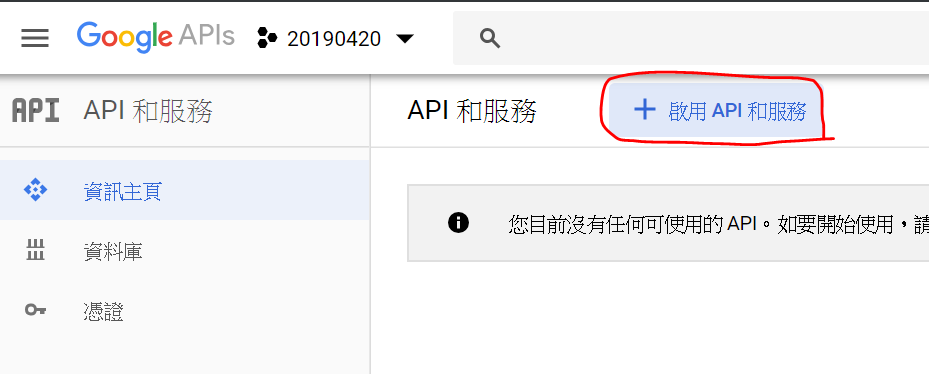

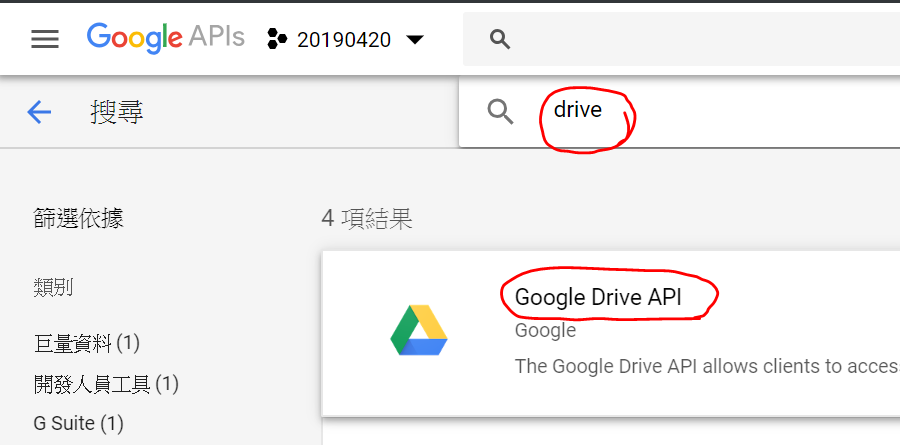

![images/CONSOLE13.PNG](attachment:CONSOLE13.PNG)

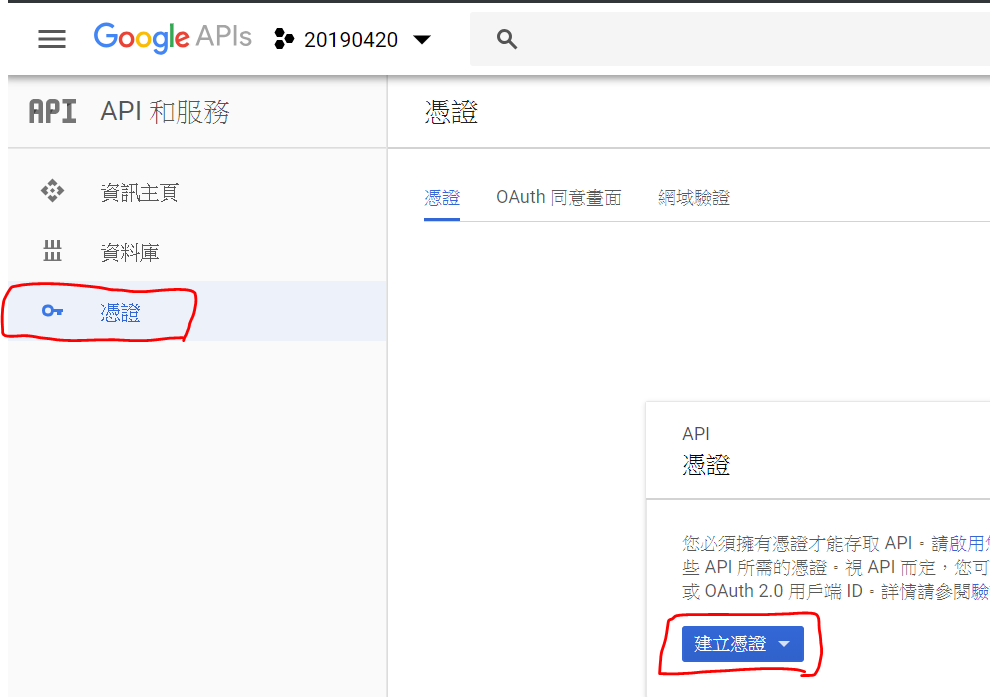

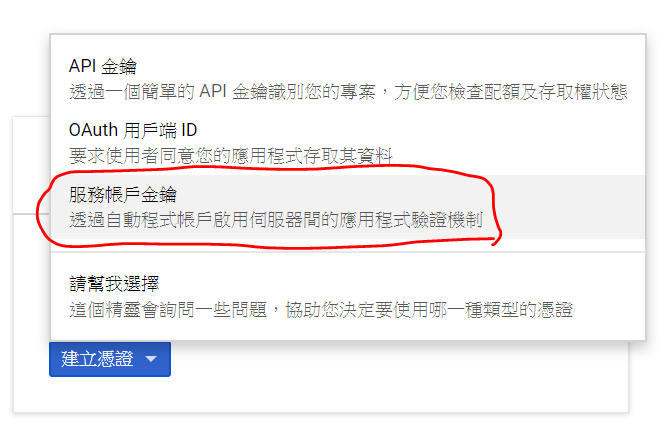

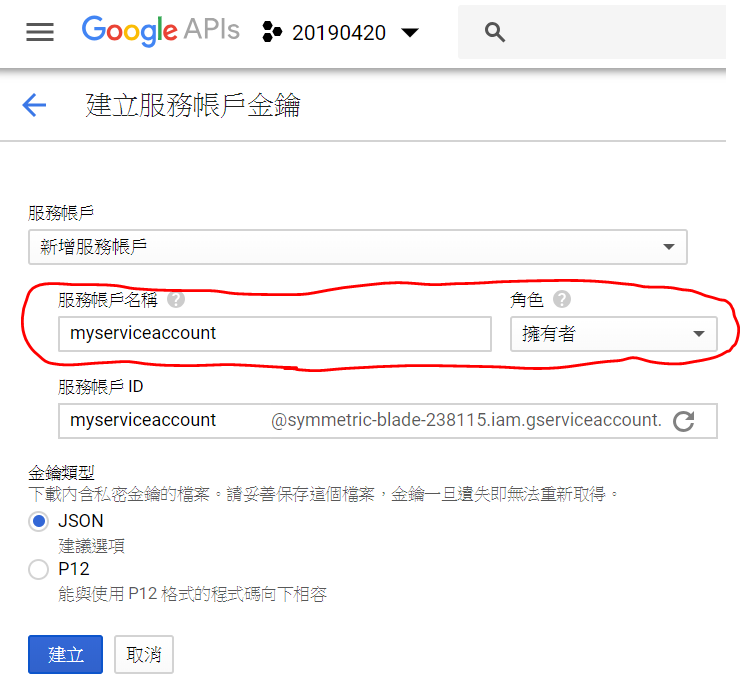

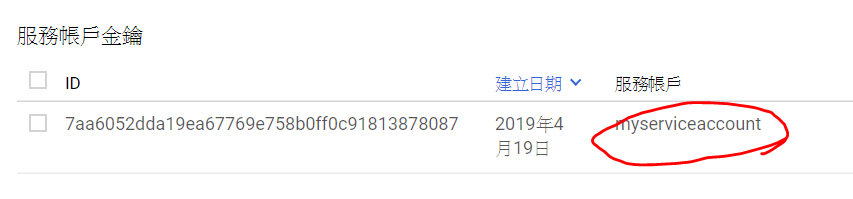


此處會下載一個驗證用的 json 檔案。請保存在您的 jupyter notebook 資料夾


會自動下載一個 .json 檔。裡面有一個欄位 "client_email": "myserviceaccount@symmetric-blade-238115.iam.gserviceaccount.com",

然後進入這個檔案的 "共用" 當中，設定讓這個 email 身分的人編輯的權限。
這個身分要給他編輯權限才能編輯。



# 區分各種憑證

在Google APIs Console中的憑證欄位，除了API金鑰 / OAuth 2.0 用戶端 ID ，第三個能夠創建的就是 服務帳戶金鑰，服務帳號像是創建一個新的用戶，只是此用戶是被用於 Server 端授權，並透過 IAM 管理權限。

透過服務帳號最大好處是應用程式是授權於服務帳號，而非個體用戶，像是遇到人員流動就不需要手動在管理授權；
而且也不需要在 Client又要跳出用戶授權頁面，非常適合用於對內的專案開發(此流程又稱為 two-legged OAuth)。


# 在雲端試算表的 A1, B1, C1 當中寫入資料

### 雲端試算表連結 https://docs.google.com/spreadsheets/d/1Lp42K9Q2fFlfn6wtVYDlmD37Kn9znzzIfZHozfkphl0/edit?usp=drive_web&ouid=104111931470159494501

In [7]:
import gspread, os
from oauth2client.service_account import ServiceAccountCredentials

scope = ['https://spreadsheets.google.com/feeds',
         'https://www.googleapis.com/auth/drive']

credentials = ServiceAccountCredentials.from_json_keyfile_name('20190420-myserviceaccount.json', scope)

gc = gspread.authorize(credentials)

url = 'https://docs.google.com/spreadsheets/d/1Lp42K9Q2fFlfn6wtVYDlmD37Kn9znzzIfZHozfkphl0/edit?usp=sharing'
doc = gc.open_by_url(url)
wks = doc.worksheet('sheet1')

#wks.update_acell('B2', "it's down there somewhere, let me take another look.")
# Fetch a cell range
#cell_list = wks.range('A1:B7')

wks.update_acell('A1', '測站')
wks.update_acell('B1', 'PM25')
wks.update_acell('C1', '日期')

wks

<Worksheet 'sheet1' id:0>

# 參考文獻

# https://medium.com/nine9devtw/google-sheet-with-python-1-21268dd68773

## https://medium.com/@sj82516/google-sheet-api-%E8%88%87%E6%8E%88%E6%AC%8A%E7%A0%94%E7%A9%B6-12034cb003f4 權限

https://developers.google.com/sheets/quickstart/python?hl=zh-cn

https://www.maxlist.xyz/2018/09/25/python_googlesheet_crud/

http://shian420.pixnet.net/blog/post/349631089-%5Bpython%5D-%E4%B8%B2%E6%8E%A5-google-sheet-api

https://city.shaform.com/zh/2016/03/19/gspread/ 憑證